In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
birddata=pd.read_csv("bird_tracking.csv")

In [47]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


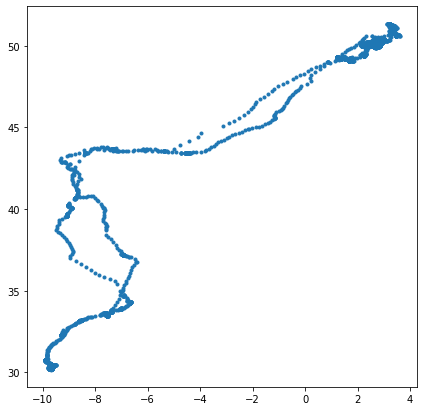

In [48]:
#trayectoria de Eric
ix=birddata.bird_name=="Eric"
x,y=birddata.longitude[ix],birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

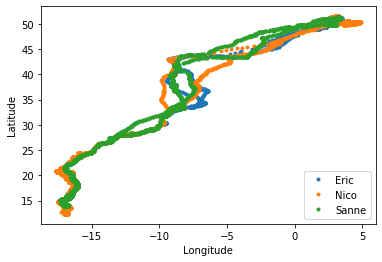

In [49]:
#trayectoria del resto
bird_names=pd.unique(birddata.bird_name)

for bird_name in bird_names:
    ix=birddata.bird_name==bird_name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

C:\Users\pc\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pc\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


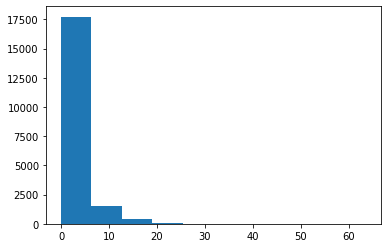

In [50]:
ix=birddata.bird_name=="Eric"
speed=birddata.speed_2d[ix]

plt.hist(speed)
plt.savefig("hist_bird.pdf")

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0, 0.5, 'Frecuency')

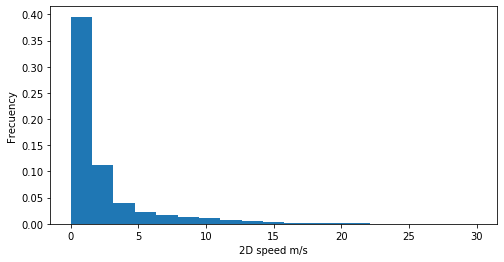

In [51]:
plt.figure(figsize=(8,4))
ix=birddata.bird_name=="Eric"
speed=birddata.speed_2d[ix]

plt.hist(speed,bins=np.linspace(0,30,20),normed=True)
plt.xlabel("2D speed m/s")
plt.ylabel("Frecuency")


In [52]:
## Using Datetime

In [53]:
import datetime

In [54]:
time_1=datetime.datetime.today()


In [55]:
time_2=datetime.datetime.today()

In [56]:
time_2-time_1

datetime.timedelta(microseconds=7023)

In [57]:
date_str=birddata.date_time[0]
type(date_str)

str

In [58]:
date_str[:-3]

'2013-08-15 00:18:08'

In [59]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [60]:
##CONVERTIMOS A ESTE FORMATO TODAS LAS FECHAS DEL DATASET

In [61]:
timestamp=[]
for k in range(len(birddata)):
    timestamp.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))

In [62]:
timestamp[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [63]:
##agregamos estod valores a la data principal
birddata["timestamp"]=pd.Series(timestamp,index=birddata.index)

In [64]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [65]:
##practiquemos haciendo aritmetica con nuestros datos

In [66]:
birddata.timestamp[4]-birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [67]:
##calcularemos el tiempo transcurido de cada tempo con respecto al inicio

In [68]:
times=birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time=[time-times[0] for time in times]
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [69]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [70]:
##si queremos saber cuantas observaciones pasaron de un momento a otro

In [71]:

#cuantos dias pasaron
elapsed_time[1000]/datetime.timedelta(days=1)

12.084722222222222

In [72]:
#cuantos dias pasaron
elapsed_time[1000]/datetime.timedelta(hours=1)

290.03333333333336

Text(0, 0.5, 'Elapsed time (days)')

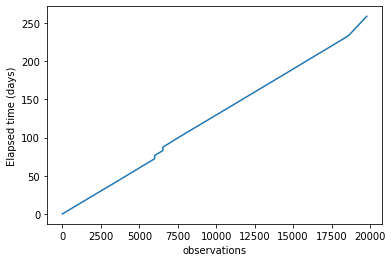

In [73]:
##graficaremos esto
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("observations")
plt.ylabel("Elapsed time (days)")

In [74]:
# Calculating Daily Mean Speed

In [75]:
"""Inicio de la transcripción. Salta al final.
Nuestro próximo objetivo es crear un diagrama donde en el eje y,
Tenemos la velocidad media diaria.
Y en el eje x, tenemos el tiempo medido en días."""

'Inicio de la transcripción. Salta al final.\nNuestro próximo objetivo es crear un diagrama donde en el eje y,\nTenemos la velocidad media diaria.\nY en el eje x, tenemos el tiempo medido en días.'

In [79]:
elapsed_days=np.array(elapsed_time) / datetime.timedelta(days=1)



In [84]:
data=birddata[birddata.bird_name=="Eric"]
times=data.timestamp
elapsed_time=[time -times[0] for time in times]
elapsed_days=np.array(elapsed_time) / datetime.timedelta(days=1)

next_day=1
inds=[]
dayli_mean_speed=[]
for i,t in enumerate(elapsed_days):
    if t<next_day:
        inds.append(i)
    else:
        dayli_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day+=1
        inds=[]
        


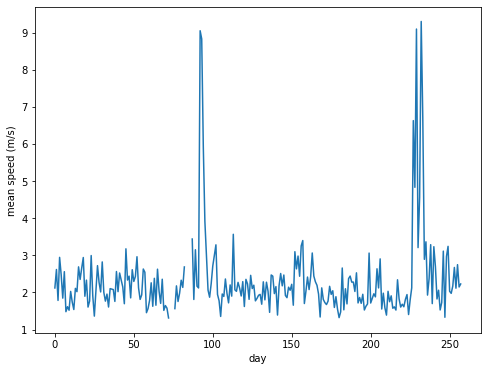

In [85]:
plt.figure(figsize=(8,6))
plt.plot(dayli_mean_speed)
plt.xlabel("day")
plt.ylabel("mean speed (m/s)")
plt.savefig("dms.pdf")

In [143]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [147]:
data=birddata.timestamp[birddata.bird_name=="Sanne"]
min(data)

Timestamp('2013-08-15 00:01:08')

In [ ]:
times

In [136]:
time1=datetime.datetime.today()
time1

datetime.datetime(2020, 6, 8, 22, 19, 30, 569160)

In [137]:
time2=datetime.datetime.today()
time2

datetime.datetime(2020, 6, 8, 22, 19, 37, 809628)

In [138]:
time3=datetime.datetime.today()
time3

datetime.datetime(2020, 6, 8, 22, 19, 40, 857232)

In [139]:
min(time1,time2,time3)

datetime.datetime(2020, 6, 8, 22, 19, 30, 569160)

In [141]:
data

0       2013-08-15 00:18:08
1       2013-08-15 00:48:07
2       2013-08-15 01:17:58
3       2013-08-15 01:47:51
4       2013-08-15 02:17:42
                ...        
19790   2014-04-30 21:51:26
19791   2014-04-30 22:21:33
19792   2014-04-30 22:51:41
19793   2014-04-30 23:21:34
19794   2014-04-30 23:51:29
Name: timestamp, Length: 19795, dtype: datetime64[ns]

In [148]:
## Using the Cartopy Library

In [150]:
"""
Nuestro siguiente paso es instalar Cartopy, una biblioteca que
proporciona herramientas cartográficas para Python."""

'Inicio de la transcripción. Salta al final.\nNuestro siguiente paso es instalar Cartopy, una biblioteca que\nproporciona herramientas cartográficas para Python.'

In [166]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#https://scitools.org.uk/cartopy/docs/latest/installing.html#installing

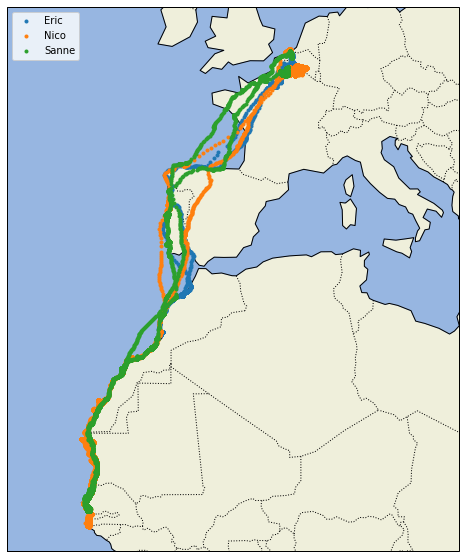

In [165]:
proj=ccrs.Mercator()
plt.figure(figsize=(10,10))



ax=plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,LINESTYLE=":")


for name in bird_names:
    ix=birddata["bird_name"]==name
    x,y = birddata.longitude[ix],birddata.latitude[ix]
    ax.plot(x,y,".",transform=ccrs.Geodetic(),label=name)

plt.legend(loc="upper left")
plt.savefig("map2.pdf")